In [3]:
import numpy as np
from Network import Network
import matplotlib.pyplot as plt

Epoch #: 1 | Most Recent Error" 0.602126051617672
Epoch #: 2 | Most Recent Error" 0.515850896356351
Epoch #: 3 | Most Recent Error" 0.5947081968951587
Epoch #: 4 | Most Recent Error" 0.5377898581304096
Epoch #: 5 | Most Recent Error" 0.5907216334052972
Epoch #: 6 | Most Recent Error" 0.15563094111377784
Epoch #: 7 | Most Recent Error" 0.5384343991922876
Epoch #: 8 | Most Recent Error" 0.3795348491438964
Epoch #: 9 | Most Recent Error" 0.39320706556203755
Epoch #: 10 | Most Recent Error" 0.4487920544238312
Epoch #: 11 | Most Recent Error" 0.34795794694046184
Epoch #: 12 | Most Recent Error" 0.33810771084829105
Epoch #: 13 | Most Recent Error" 0.7127348553059182
Epoch #: 14 | Most Recent Error" 0.40537078235996415
Epoch #: 15 | Most Recent Error" 0.5966892405138603
Epoch #: 16 | Most Recent Error" 0.2979734852477978
Epoch #: 17 | Most Recent Error" 0.2175870494091356
Epoch #: 18 | Most Recent Error" 0.26464794670607616
Epoch #: 19 | Most Recent Error" 0.14653420712048756
Epoch #: 20 | Mo

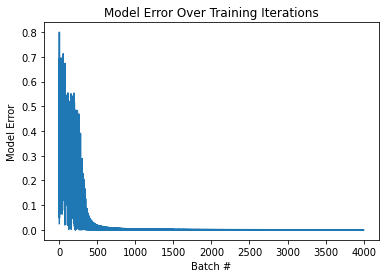

array([[ 1.84454309e-04],
       [ 1.84454309e-04],
       [ 9.78452110e-01],
       [ 9.78452110e-01],
       [ 9.75729280e-01],
       [ 9.75729280e-01],
       [-3.95132489e-04],
       [ 9.75729280e-01],
       [-3.95132489e-04]])

In [4]:
# setting up test/train data arrays #CLEAN UP AND CHECK FOR ACCURACY
X_train = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y_train = np.array([[0], [1], [1], [0]])
Y_train_2 = np.array([[0], [0], [0], [1]])
X_test = np.array([[0, 0], [0, 0], [0, 1], [0, 1], [1, 0], [1, 0], [1, 1], [1, 0], [1, 1]])
Y_test = np.array([[0], [0], [1], [1], [1], [1], [0], [1], [0]])
Y_test_2 = np.array([[0], [0], [0], [0], [0], [0], [1], [0], [1]])


# creating model object
model = Network('mse', X_train, Y_train, X_test, Y_test, x_features=2, epoch_num=1000,
                layer_num=2, layer_depths=[3,1], learn_rate=0.1)

model.add_Layer('tanhyp', 'initial_hidden')

# adding output layer
model.add_Layer('tanhyp', 'output')

# training model
model.train()

# plotting model error while training
model.plot_train_error()

# testing model classification abilities
model.test_binary_classification()

#showing model prediction for a given input vector
model.predict(X_test)

In [5]:
#optimized homebrew model params
print(model)

Network trained with mse Cost Function. Layers: 
[Initial_Hidden Layer with 3 tanhyp Comprising Neurons. 
Neuron Weights Array: 
 [[ 1.9636718  -2.23639751]
 [ 1.30959587 -1.85864821]
 [ 0.79772381  0.35588945]] 
 Next Layer in the NN is 1 Neurons Deep
 Output Layer with 1 tanhyp Comprising Neurons. 
Neuron Weights Array: 
 [[-1.91256938  1.82607832  1.270856  ]]]


In [6]:
from sklearn.neural_network import MLPClassifier

skl_model = MLPClassifier(hidden_layer_sizes = (3) ,activation='tanh',solver ='sgd',batch_size=1,learning_rate_init=0.1,max_iter=1000,momentum=0)
skl_model.fit(X_train,Y_train.flatten())

score = skl_model.score(X_test, Y_test.flatten())
print(f'Model Achieves an test accuracy of {score*100}%')

Model Achieves an test accuracy of 100.0%


[array([[ 1.58896968, -2.6018753 ,  2.71878364],
       [-2.13245921, -1.70931252,  3.24059882]]), array([[2.68725986],
       [4.10835425],
       [4.25843223]])]


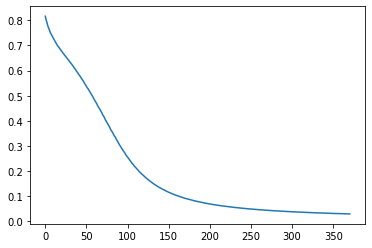

In [7]:
#printing optimal model parameters
optimized_model_params = skl_model.coefs_
print(optimized_model_params)

#showing the model loss curve


loss_curve = skl_model.loss_curve_

plt.plot(np.arange(len(loss_curve)),loss_curve)
plt.show()

In [ ]:
#mking predictions using the model
skl_model.predict(X_test)